<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Data_Science_Core_W8_Independent_Project_2021_12_04_Faith_Rotich_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

Overview 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

Dataset Columns

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4


a) Defining the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.






b) Metric for Success

Clean dataset

Exploratory Data Analysis 

Decision Trees - Random Forest, Ada Boost, Gradient Boost 

SVM - rbf, sigmoid, polynomial functions 

c) Validating the data

Challenge the solution by providing insights on how you can make improvements in model improvement.




d) Experimental Design

Data preparation

Data analysis

Data modeling


# 2. Reading the Data

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
thyroid = pd.read_csv("hypothyroid.csv")

In [3]:
# creating a copy for modelling
df = thyroid

In [4]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


# 3. Checking the Data

In [6]:
# Checking the size of the dataset 

thyroid.shape

(3163, 26)

In [7]:
# Statistical summary 

thyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [8]:
# Checking the datatypes

thyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [9]:
thyroid.columns 

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

# 4. External Data Source Validation

Data is valid in comparison to other similar data sources 

# 5. Data Cleaning Procedures

In [10]:
# Checking unique values for all the columns

interest = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TBG']
for i in interest:
  print(i, thyroid[i].unique())

status ['hypothyroid' 'negative']
age ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
sex ['M' 'F' '?']
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
thyroid_surgery ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
pregnant ['f' 't']
sick ['f' 't']
tumor ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
TBG ['?' '28' '34' '0' '19' '30' '25' '48' '39' '31' '16' '21' '37' '40' '27'
 '3.10' '38' '108' '20' '36' '17' '23' '35' '32' '63' '9.30' '15' '26'
 '33' '41' '110' '22' '43' '53' '80' '47' '29' '13' '24' '18' '45' '86'
 '

The sex column has ? as an entry 

In [11]:
# Replace '?' with nan
thyroid.replace('?', np.nan, inplace=True)

In [12]:
# Check for missing values 
thyroid.isnull().sum().sort_values(ascending=False) / thyroid.shape[0] * 100

TBG                          91.779956
T3                           21.972811
TSH                          14.796080
age                          14.100537
TT4                           7.872273
T4U                           7.840658
FTI                           7.809042
sex                           2.307936
pregnant                      0.000000
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
lithium                       0.000000
sick                          0.000000
tumor                         0.000000
TBG_measured                  0.000000
goitre                        0.000000
TSH_measured                  0.000000
T3_measured                   0.000000
TT4_measured                  0.000000
T4U_measured                  0.000000
FTI_measured                  0.000000
status                   

In [13]:
# Dropping the TBG column

thyroid.drop('TBG', axis=1, inplace=True)

In [14]:
# Determining distribution of target variable
thyroid['status'].value_counts(normalize=True) * 100

negative       95.226051
hypothyroid     4.773949
Name: status, dtype: float64

In [15]:
# Filling missing values in the sex column with mode
#
thyroid.sex.fillna(thyroid.sex.mode()[0], inplace = True)



In [16]:
  
# Checking whether the missing values have been filled appriopriately
#
thyroid.isnull().sum().any()

True

In [17]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n


In [18]:
# Changing column datatypes to their appriopriate datatypes
# Lists of numerical, categorical and bool columns have been created for efficiency
# Numerical columns list
#
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

# Categorical columns list
cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',\
            't4u_measured', 'fti_measured', 'tbg_measured']

# Boolean columns list
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in bool_cols:
  df[column] = df[column].replace('f', False)
  df[column] = df[column].replace('t', True)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
thyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                   object
TSH                            object
T3_measured                    object
T3                             object
TT4_measured                   object
TT4                            object
T4U_measured                   object
T4U                            object
FTI_measured                   object
FTI                            object
TBG_measured                   object
dtype: object

In [19]:
# Convert column data types

numeric_columns = ['age', 'TSH','T3', 'TT4','T4U','FTI']
thyroid[numeric_columns] = thyroid[numeric_columns].astype(np.float64)

In [20]:
# Describe numeric columns
thyroid.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [21]:
thyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                   object
TSH                           float64
T3_measured                    object
T3                            float64
TT4_measured                   object
TT4                           float64
T4U_measured                   object
T4U                           float64
FTI_measured                   object
FTI                           float64
TBG_measured                   object
dtype: object

In [22]:
thyroid.isnull().sum()

status                         0
age                          446
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

In [23]:


# Filling missing values in the sex column with mode
#

thyroid.sex.fillna(df.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
# A for loop has been used for efficiency
#
for column in numeric_columns:
  thyroid[column].fillna(thyroid[column].mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
thyroid.isnull().sum().any()

False

In [24]:
thyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

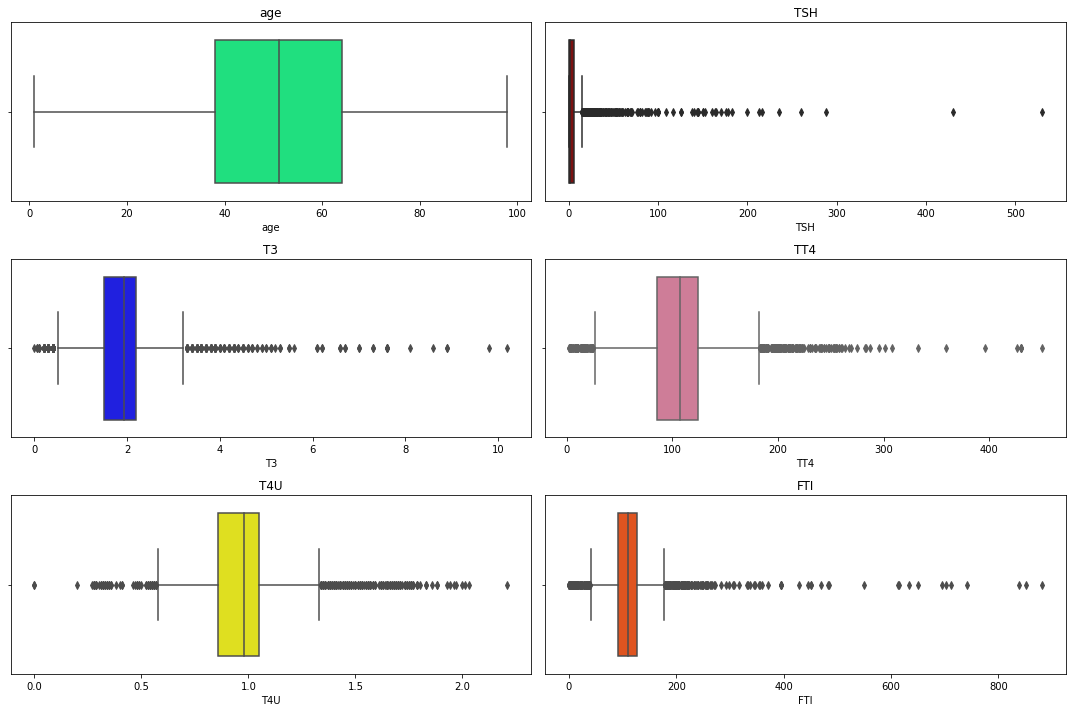

In [25]:
# Determine outlier in data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, colour, ax in zip(numeric_columns, colors, axes.flatten()):
  
  sns.boxplot(thyroid[col],  ax=ax, color=colour)
  ax.set_title(f'{col}')

plt.tight_layout()

# 6. EDA

In [26]:
thyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n


In [27]:
# The target variable is Status
# Checking the outputs for the target variable 

thyroid['status'].value_counts()

# There are two outputs; negative for negative and hypothyroid for positive

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [ ]:
thyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                   object
TSH                           float64
T3_measured                    object
T3                            float64
TT4_measured                   object
TT4                           float64
T4U_measured                   object
T4U                           float64
FTI_measured                   object
FTI                           float64
TBG_measured                   object
dtype: object

In [ ]:
df_thyroid = thyroid

In [ ]:
# 1. Univariate 

In [ ]:
# Creating a user defined function for univariate visuals 
def univariate_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  if kind == 'pie':
    thyroid[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(8, 6), rot=90)
  elif kind == 'bar':
    thyroid[column].value_counts().plot(kind=kind, figsize=(8, 6), rot=90)
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()

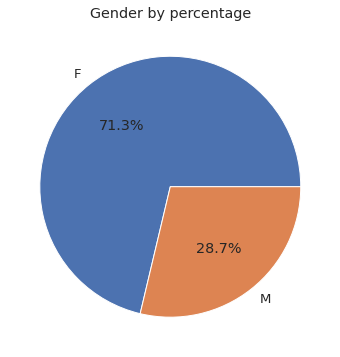

In [ ]:
univariate_visuals('sex', 'pie', 'Gender by percentage', '', '')

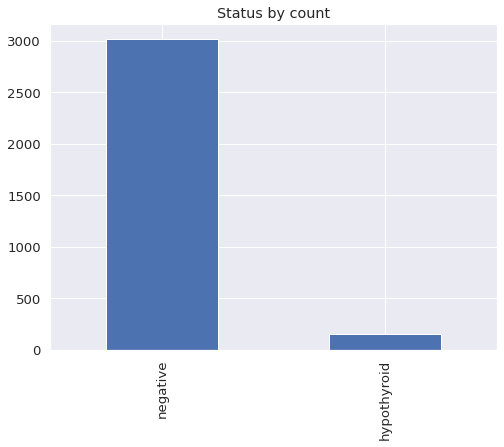

In [ ]:
univariate_visuals('status', 'bar', 'Status by count', '', '')

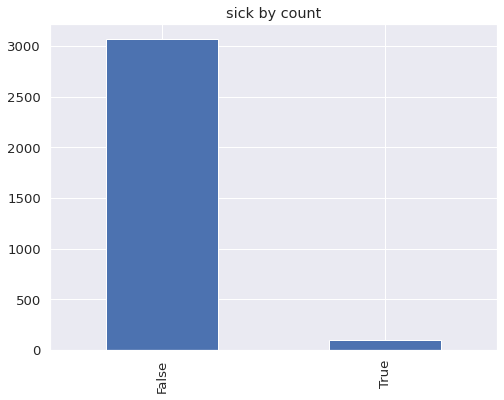

In [ ]:
univariate_visuals('sick', 'bar', 'sick by count', '', '')

In [ ]:
# 2. bi-variate 

def bi_visuals(column, title, xlabel, ylabel):
  crosstab = rp.crosstab(thyroid[column], thyroid['status'], prop = 'row')
  crosstab['status'][['hypothyroid','negative']].drop('All').plot(kind = 'bar', stacked = True, figsize = (8,6))
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1.02)
  return plt.show()

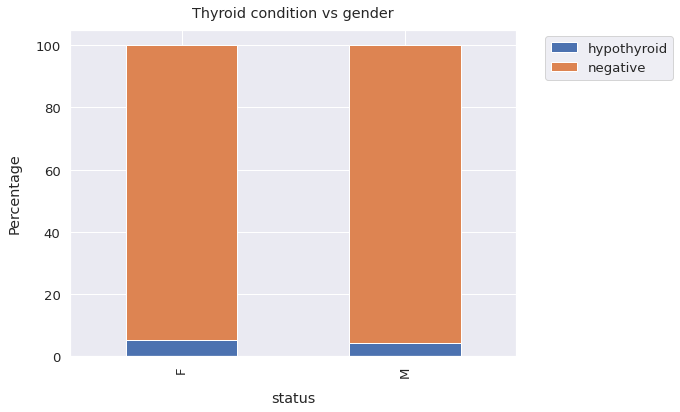

In [ ]:
# Willingness to sex vs thyroid condition
bi_visuals('sex', 'Thyroid condition vs gender', 'status', 'Percentage')

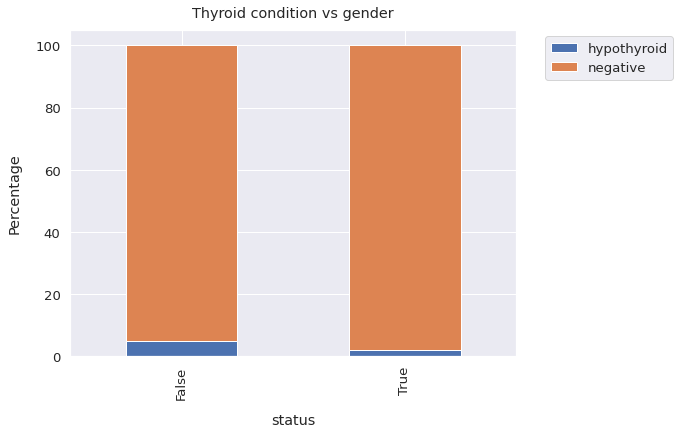

In [ ]:
# sick verses thyroid condition
bi_visuals('sick', 'Thyroid condition vs gender', 'status', 'Percentage')

In [ ]:
# Converting all the column data types to the appropriate data type for Analysis

In [ ]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


The mean age is 50.97


In [ ]:
# Correlation 

# Displaying the correlations between the variables
#
correlation = thyroid.drop('status', axis = 1).corr()
correlation

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.001552,-0.021606,-0.063665,-0.013207,0.051351,-0.091812,-0.164818,0.068590,-0.065635,-0.021321,-0.038627,-0.009155,-0.332307,-0.103116,-0.226361,0.027389
on_thyroxine,-0.001552,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,-0.003311,0.023499,0.219283,0.073641,0.116117
query_on_thyroxine,-0.021606,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-0.019866,-0.021164,-0.020115,-0.034624,-0.004390
on_antithyroid_medication,-0.063665,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-0.001711,0.074606,-0.003296,0.028649,-0.019334
thyroid_surgery,-0.013207,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,0.011656,-0.009696,-0.018275,0.024862,-0.027261
query_hypothyroid,0.051351,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,0.069439,-0.049431,-0.015260,0.036081,-0.047833
query_hyperthyroid,-0.091812,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-0.029907,0.220074,0.164143,0.078444,0.084608
pregnant,-0.164818,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,-0.014915,0.215710,0.172383,0.337944,-0.007425
sick,0.068590,-0.063956,-0.023912,-0.020852,-0.033144,-0.051623,-0.051854,-0.025625,1.000000,-0.020343,-0.004521,-0.032311,-0.007839,-0.102766,-0.042416,-0.048681,-0.023428
tumor,-0.065635,-0.022691,0.049880,-0.013129,-0.020868,-0.032502,-0.032648,0.004117,-0.020343,1.000000,-0.002847,-0.020343,-0.022554,0.028969,-0.014986,0.024677,-0.026791


In [ ]:
# Checking the VIF score for each variable using an inverse of the correlation matrix

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
age,1.179384,0.031179,0.034169,0.034794,0.012688,-0.047711,0.029045,0.096034,-0.032930,0.057822,0.017452,-0.009254,0.030781,0.433925,-0.165403,0.092268,-0.032597
on_thyroxine,0.031179,1.110746,0.015951,-0.000378,-0.035298,-0.060326,0.130072,0.030257,0.075096,0.017706,0.012726,0.017492,-0.082823,0.178083,-0.512883,0.048551,0.142669
query_on_thyroxine,0.034169,0.015951,1.008345,0.011704,-0.017953,0.017047,0.036961,0.009454,0.028048,-0.046607,0.002254,-0.008354,0.019335,0.018004,-0.023758,0.044406,0.026649
on_antithyroid_medication,0.034794,-0.000378,0.011704,1.025968,0.011330,0.029306,-0.115751,0.017848,0.011118,0.017788,0.004085,0.035094,0.009032,-0.088093,0.077110,-0.009473,0.007250
thyroid_surgery,0.012688,-0.035298,-0.017953,0.011330,1.006531,0.005893,-0.029979,0.023186,0.031200,0.023828,0.006293,0.024888,0.007316,0.013366,0.056784,-0.058028,-0.021981
query_hypothyroid,-0.047711,-0.060326,0.017047,0.029306,0.005893,1.023982,0.003526,0.015695,0.057276,0.028572,-0.040968,0.021449,-0.061386,0.048899,-0.056639,-0.028380,0.057744
query_hyperthyroid,0.029045,0.130072,0.036961,-0.115751,-0.029979,0.003526,1.091158,-0.028293,0.040719,0.038085,0.009220,-0.022850,-0.046307,-0.168492,-0.228183,0.109189,0.121244
pregnant,0.096034,0.030257,0.009454,0.017848,0.023186,0.015695,-0.028293,1.158229,0.001102,0.009984,0.020072,-0.050490,0.025933,-0.022704,0.075516,-0.427790,-0.151334
sick,-0.032930,0.075096,0.028048,0.011118,0.031200,0.057276,0.040719,0.001102,1.025509,0.019896,0.001217,0.024404,0.010164,0.111386,-0.090968,0.026706,0.053253
tumor,0.057822,0.017706,-0.046607,0.017788,0.023828,0.028572,0.038085,0.009984,0.019896,1.013610,0.005450,0.027716,0.033733,-0.035028,0.046905,-0.026824,0.003811


In [ ]:
# 3. Multivariate analysis

In [ ]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [28]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
thyroid_df =thyroid.apply(LabelEncoder().fit_transform)

In [29]:
thyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,70,1,0,0,0,0,0,0,0,0,0,0,0,1,166,1,7,1,22,1,117,1,19,0
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,222,1,18,1,26,1,82,1,26,0
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,69,1,0,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,238,1,5,1,8,1,73,1,9,0
4,0,75,1,0,0,0,0,0,0,0,0,0,0,0,1,107,1,13,1,63,1,97,1,48,0


In [ ]:
thyroid_df.dtypes

status                       int64
age                          int64
sex                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
TSH_measured                 int64
TSH                          int64
T3_measured                  int64
T3                           int64
TT4_measured                 int64
TT4                          int64
T4U_measured                 int64
T4U                          int64
FTI_measured                 int64
FTI                          int64
TBG_measured                 int64
dtype: object

In [ ]:
import researchpy as rp

In [ ]:
!pip install researchpy

In [ ]:
# Conducting factor analysis to reduce the number of variables
# Selecting the variables that we will conduct factor analysis on
# These variables are chosen because they are ordinal 
thyroid_multi = thyroid_df[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']]
thyroid_multi.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,22,1,116,1,19,0
1,12,0,1,0,0,0,0,0,0,0,0,0,0,1,221,1,18,1,26,1,81,1,26,0
2,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,68,1,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,1,237,1,5,1,8,1,72,1,9,0
4,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,63,1,96,1,48,0


In [ ]:
thyroid_multi.shape[1]

24

In [ ]:
# Dropping null values
thyroid_multi.dropna(inplace=True)

In [ ]:
thyroid_multi.dtypes

age                          int64
sex                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
TSH_measured                 int64
TSH                          int64
T3_measured                  int64
T3                           int64
TT4_measured                 int64
TT4                          int64
T4U_measured                 int64
T4U                          int64
FTI_measured                 int64
FTI                          int64
TBG_measured                 int64
dtype: object

Before we conduct factor analysis, we need to check that our dataset is factorable.

To do this we will conduct Bartlett’s test of sphericity which compares an observed correlation matrix with the identity matrix

Null: Variables are not correlated i.e. not factorable

Alt: Variables are correlated enough i.e factorable

In [ ]:
!pip install factor_analyzer==0.2.3

In [ ]:
# Importing Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Conducting the test
chi_square_value,p_value=calculate_bartlett_sphericity(thyroid_multi)
p_value

0.0

Our p value is less than 0.05 therefore we reject the null hypothesis and conclude that our variables are factorable

The second test is the Kaiser-Meyer-Olkin (KMO) Test which measures the suitability of data for factor analysis.

A KMO value of less than 0.6 is considered inadequate.

In [ ]:
# Importing the KMO test
from factor_analyzer.factor_analyzer import calculate_kmo

# Conducting the test
kmo_all,kmo_model=calculate_kmo(thyroid_multi)

In [ ]:
# Finding out our results
kmo_model

# The overall KMO for our dataset is 0.812246 which is adequate


0.8122467331548946

In [ ]:

# To determine the number of factors we will use the kaiser rule which is to drop all components with eigenvalues under 1.0.
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(thyroid_multi, 24, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,7.644654
1,1.526206
2,1.443429
3,1.282324
4,1.100001
5,1.080958
6,1.020584
7,1.010836
8,0.984064
9,0.968665


As shown above 7 factors have an eigen value greater than one so we will chose 7 factors only

We can visualize the eigen-values with a scree plot

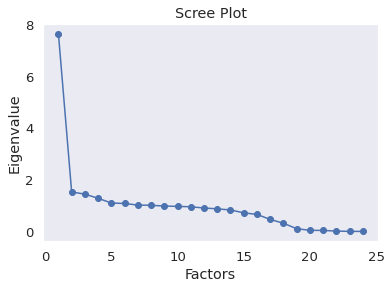

In [ ]:
# Creating the scree plot
plt.scatter(range(1,thyroid_multi.shape[1]+1),ev)
plt.plot(range(1,thyroid_multi.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(thyroid_multi, 7, rotation="varimax")
# Showing our factor loadings
# Factor loadings indicate how much a factor explains a variable
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
age,0.056893,-0.187861,0.045282,-0.084286,-0.323515,0.088218,0.068524
sex,0.079346,-0.072612,-0.158708,-0.007304,-0.140921,-0.011045,-0.344877
on_thyroxine,0.082787,0.262359,0.178914,-0.138634,0.021252,0.088579,0.206028
query_on_thyroxine,0.062487,0.087229,-0.018649,-0.044182,-0.008647,-0.148431,-0.123499
on_antithyroid_medication,-0.037241,0.011368,-0.018906,0.144784,0.029899,0.004625,-0.005310
thyroid_surgery,0.007980,0.007953,-0.010991,0.019350,-0.008649,0.017405,0.086787
query_hypothyroid,0.037008,0.042464,-0.010896,-0.037688,-0.045189,-0.016376,0.246211
query_hyperthyroid,-0.010867,0.019675,0.121948,0.859643,0.079166,-0.042402,0.050844
pregnant,0.014588,-0.016743,0.031132,0.043110,0.409728,0.049114,0.034284
sick,0.009097,-0.106473,-0.028580,-0.041628,-0.050413,0.010159,-0.064655


# Implementing the Solution

# 7. Decision Trees

In [ ]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [ ]:
thyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,22,1,116,1,19,0
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,221,1,18,1,26,1,81,1,26,0
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,68,1,0,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,237,1,5,1,8,1,72,1,9,0
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,63,1,96,1,48,0


In [ ]:
thyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets 
# Separating the target variable 

y = thyroid_df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI',]
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = thyroid_df[test_features].values


In [ ]:

# Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create a decision tree classifier

clf = DecisionTreeClassifier(max_depth=6, min_samples_split=100)

# Train it on our training set.
clf_class = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = clf_class.predict(X_test)


from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 98.73617693522907


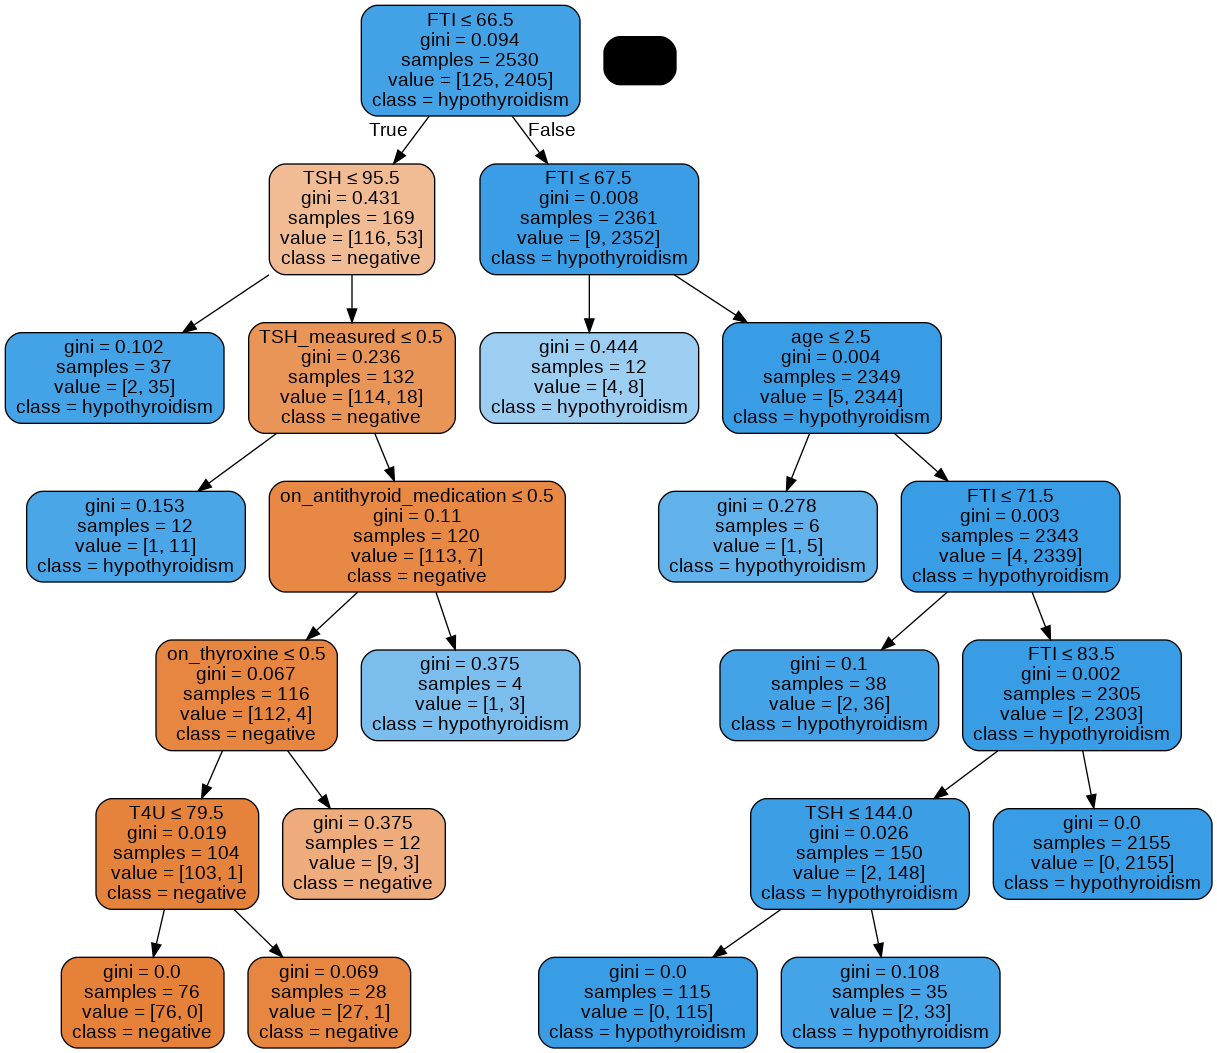

In [ ]:
# Visualizing 

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_class, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['negative', 'hypothyroidism'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism.png')
Image(graph.create_png())

In [ ]:
# Using feature importances 

# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.004), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0174), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0126), ('TSH', 0.1307), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.8353)]

Variable: FTI                  Importance: 0.8353
Variable: TSH                  Importance: 0.1307
Variable: on_antithyroid_medication Importance: 0.0174
Variable: TSH_measured         Importance: 0.0126
Variable: on_thyroxine         Importance: 0.004
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid

Random Forest Classifier 

In [ ]:
y = thyroid_df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI',]

X = thyroid_df[test_features].values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for random forest classifier :",metrics.accuracy_score(y_test, y_pred_forest)*100)

Accuracy for random forest classifier : 97.78830963665087


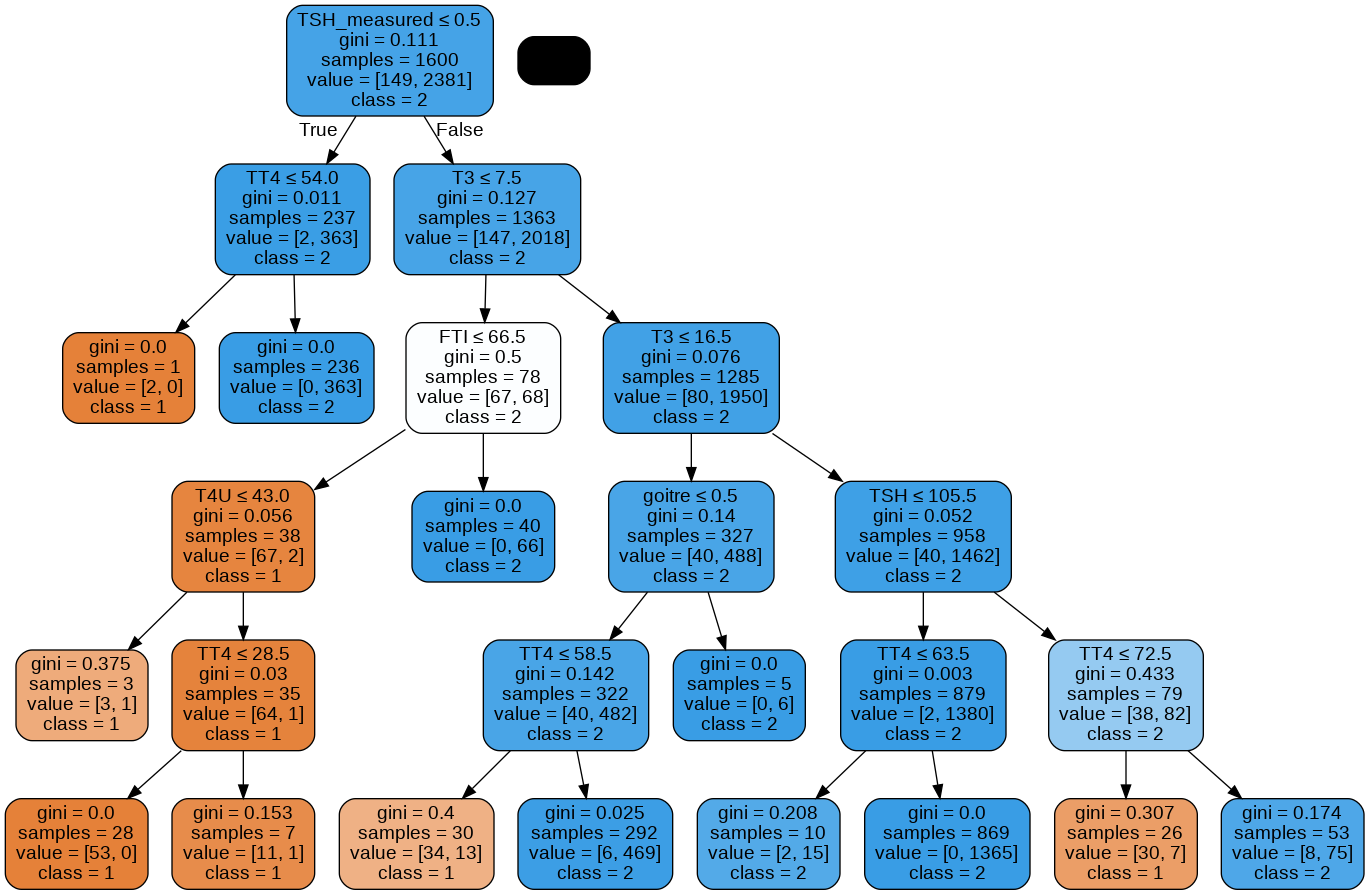

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cmc.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.01), ('TSH', 0.1), ('T3_measured', 0.0), ('T3', 0.25), ('TT4_measured', 0.0), ('TT4', 0.34), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.29)]

Variable: TT4                  Importance: 0.34
Variable: FTI                  Importance: 0.29
Variable: T3                   Importance: 0.25
Variable: TSH                  Importance: 0.1
Variable: TSH_measured         Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
V

In [ ]:
# Random Forests

In [ ]:

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.968404
std,0.198619,0.175059
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Let's assess how well our random forest is doing.

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.022116903633491312
Mean Squared Error: 0.022116903633491312
Root Mean Squared Error: 0.14871752967788066


The RMSE Score of 0.1498 shows that the Random Forest Model is performing better

In [ ]:
# Random Forest using 50 trees

In [ ]:
! pip install six

In [ ]:
from six import StringIO

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

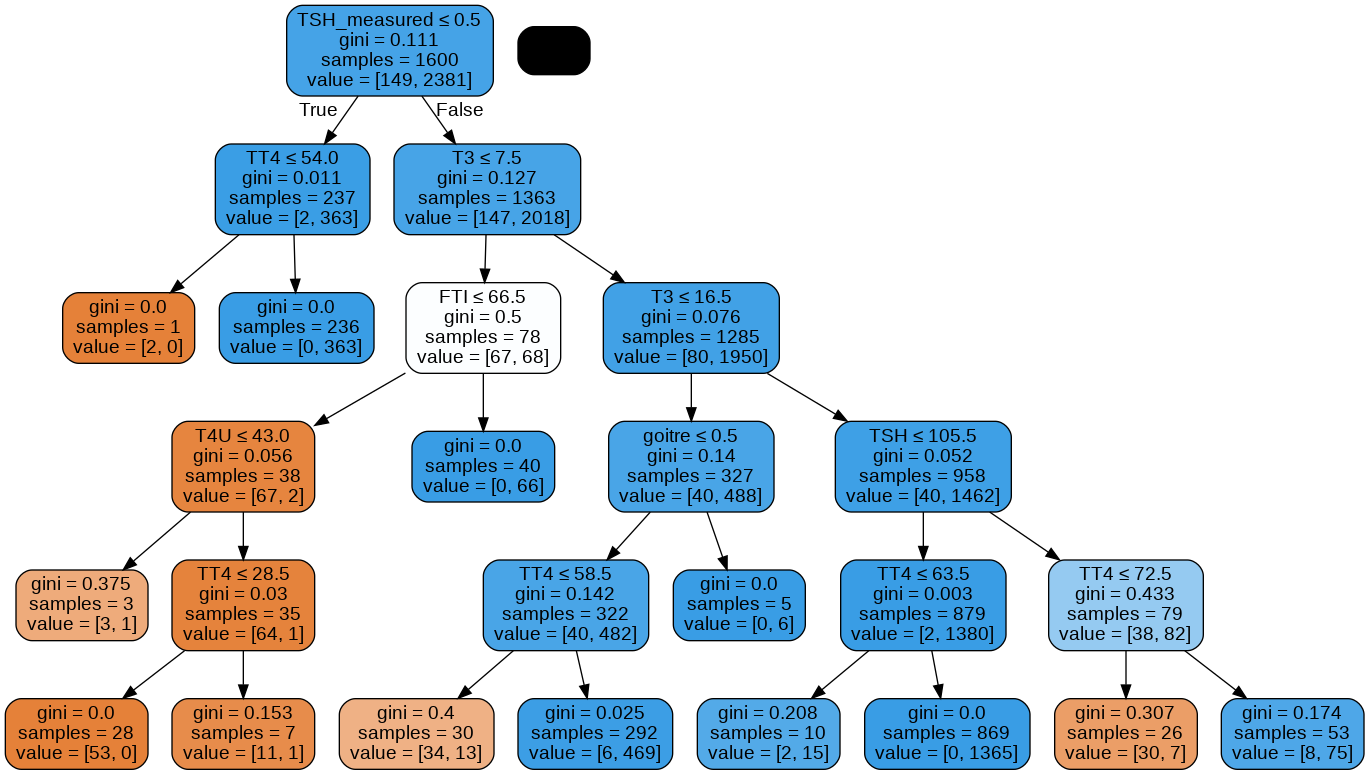

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick the 50th tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())


In [ ]:
# Using feature importances 

# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0003), ('TSH_measured', 0.0112), ('TSH', 0.1011), ('T3_measured', 0.0), ('T3', 0.2521), ('TT4_measured', 0.0), ('TT4', 0.3404), ('T4U_measured', 0.0), ('T4U', 0.0019), ('FTI_measured', 0.0), ('FTI', 0.293)]

Variable: TT4                  Importance: 0.3404
Variable: FTI                  Importance: 0.293
Variable: T3                   Importance: 0.2521
Variable: TSH                  Importance: 0.1011
Variable: TSH_measured         Importance: 0.0112
Variable: T4U                  Importance: 0.0019
Variable: goitre               Importance: 0.0003
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_th

In [ ]:
thyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

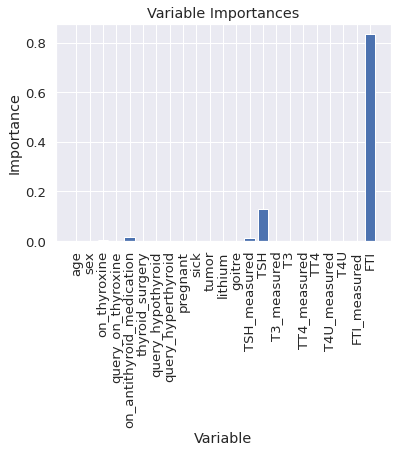

In [ ]:
# Representing the feature importances visually 

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

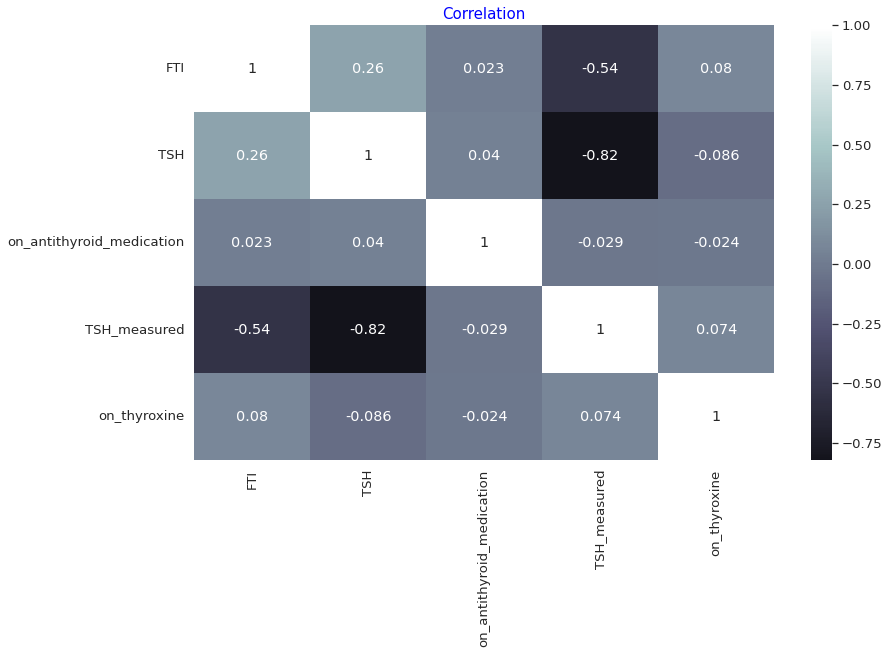

In [ ]:
# Plotting a heatmap to show correlations between the important variables
#
corr = thyroid_df[['FTI', 'TSH' , 'on_antithyroid_medication', 'TSH_measured' , 'on_thyroxine']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='bone', annot = True, center = 0)
plt.title('Correlation', fontsize = 15, color = 'blue')
plt.show()

From the above chart we can make these observations

There is a strong positive relationship between TSH_measured and TSH -0.82
TSH and FTI have a postive relationship with a correlation coefficient of 0.26

## Ada Boost

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
# Ada Boost 
from sklearn.ensemble import AdaBoostClassifier

In [32]:
# Selecting the independent variables using the important features and the target variable
#
y = thyroid_df['status'].values

test_features = ['FTI', 'TSH' , 'on_antithyroid_medication', 'TSH_measured' , 'on_thyroxine', 'age']

X = thyroid_df[test_features].values


In [33]:

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:

# Instantiating the model
#
ada_boost = AdaBoostClassifier (n_estimators=300, random_state = 0)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300, random_state=0)

In [35]:
# Making predictions
#
y_pred = ada_boost.predict(X_test)

In [36]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9842022116903634
[[ 24   2]
 [  8 599]]


Ada Boost Classifier gives an accuracy of 97.97% using all the features and 98.4% using the important features which is a slight improvement in performace but still there's overfitting

Hyperparameter tuning

In [37]:
# Selecting the independent variables using the important features and the target variable
#
y = thyroid_df['status'].values

test_features = ['FTI', 'TSH' , 'on_antithyroid_medication', 'TSH_measured' , 'on_thyroxine', 'age']

X = thyroid_df[test_features].values

In [38]:

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

# Instantiating the model
#
ada_boost = AdaBoostClassifier (n_estimators=300, random_state = 0)
ada_boost.fit(X_train, y_train)

In [40]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=300, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## Gradient Boost Classifier

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Selecting the independent variables using the important features and the target variable
#
X = thyroid_df[['FTI', 'TSH' , 'on_antithyroid_medication', 'TSH_measured' , 'on_thyroxine', 'age']].values
y = thyroid_df['status'].values

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.7, max_depth = 5)
gbc = gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for gradient boosting :",metrics.accuracy_score(y_test, y_pred_gbc)*100)

Accuracy for gradient boosting : 98.5781990521327


In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 

# 8. Support Vector Machines 

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Selecting the independent variables and the target variable
#
X = thyroid_df[['FTI', 'TSH' , 'on_antithyroid_medication', 'TSH_measured' , 'on_thyroxine', 'age']].values
y = thyroid_df['status'].values
# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'sigmoid')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'sigmoid', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
    # Measuring the accuracy of the model

  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9778714436248683 and the f1 score is: 0.9884678747940692
The accuracy score of sigmoid    is: 0.934668071654373 and the f1 score is: 0.9659714599341384
The accuracy score of Rbf        is: 0.9852476290832455 and the f1 score is: 0.9923329682365827


SVC using Rbf kernel has the best performance 

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'], gamma ='auto'}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid

# returns all the entered values 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['poly']},
             verbose=3)

In [ ]:
# Using PCA in order to do visualization on

In [ ]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics 
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
X = thyroid_df.drop('status', axis=1)
y = thyroid_df['status']


In [ ]:
# Applying PCA reduction algorithm before splitting the data in order to reduce our features from 9 to 2 in order to
# do visualization on a 2D plane

pca = PCA(n_components=2).fit(thyroid_df)
X = pca.transform(thyroid_df)
X.shape

(3163, 2)

In [ ]:
# Dividing the data into train and test sets using 80% training data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# 1. SVM using the rbf function since it was the best performing function

# Building the model 
polyclassifier = SVC(kernel='rbf',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC()

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# The polynomial function SVC model has 98.1% accuracy

0.981042654028436
[[ 19   7]
 [  5 602]]


In [ ]:
# Visualization for the rbf function 

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('status with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Conclusion 

Based on these accuracy scores, SVC using RBF performs well, but using Hyperparameter tuning using Adaboost works best.